In [1]:
# Given one project, get all of its features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Main

In [2]:
main = pd.read_csv("./data/project_main.csv",sep=';')
print(main.shape)
main.head()

(5379, 18)


,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,project_land_size_rai,project_land_size_ngan,project_land_size_wa,total_unit,percent_car_parking,starting_price,highest_price,project_status,created_at
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,54,0,0,NaN,NaN,3500000.0,3862000.0,A,2011-01-14T18:40:12.117+0700
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,154,3,89,NaN,NaN,4590000.0,NaN,U,2011-02-24T21:43:59.297+0700
2,161,11066,0.0,บ้านพฤกษา 28/2 นิคมบางปู (เทพารักษ์-สุวรรณภูมิ),NaN,1101.0,11,13.543841,100.656302,0,0,0,NaN,NaN,912400.0,1300480.0,U,2009-07-20T07:00:00.000+0700
3,73,779,0.0,เสนาแกรนด์โฮม ติวานนท์-รังสิต เอ็กซ์ตร้า โซน,Sena Grand Home Tiwanon-Rangsit Extra Zone,1301.0,13,13.975707,100.580670,112,0,17,168.0,NaN,3800000.0,NaN,A,2011-04-07T16:56:39.867+0700
4,219,818,5.0,เพอร์เฟค เพลส สุขุมวิท 77-สุวรรณภูมิ,Perfect Place Sukhumvit 77-Suvarnabhumi,1103.0,11,13.716203,100.725815,51,2,29,NaN,NaN,5000000.0,NaN,A,2010-11-10T07:00:00.000+0700


In [3]:
# Calculate project_land_size_meter
main['project_land_size_m'] = 2*100*4*main['project_land_size_rai'] + 2*100*main['project_land_size_ngan'] + 2*main['project_land_size_wa']
del main['project_land_size_rai']
del main['project_land_size_ngan']
del main['project_land_size_wa']
del main['total_unit'] # Dunno what this is.

In [4]:
# Find new project highets price
price_ratio = main['highest_price'] / main['starting_price']
price_ratio[price_ratio.notnull()].median()
# starting_price * 1.6 = highest_price

1.6258992439736661

In [5]:
import math
def getNewHighestPrice(row):
    if math.isnan(row['highest_price']): return row['starting_price']*1.6
    return row['highest_price']

main['highest_price'] = main.apply(getNewHighestPrice,axis=1)

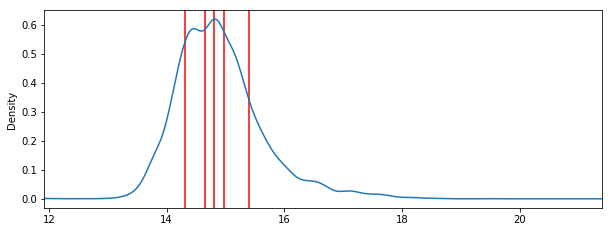

In [6]:
i = 'Log_starting_price'

# Log Transform
main[i] = np.log(main['starting_price'])

q80,q60,q50,q40,q20 = np.percentile(main.Log_starting_price.dropna(), [80,60,50,40,20])

min = q20
six = q60
mid = q50
four = q40
max = q80

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(main[i].min(), main[i].max()*1.1)
plt.axvline(x=min,color='red')
plt.axvline(x=six,color='red')
plt.axvline(x=mid,color='red')
plt.axvline(x=four,color='red')
plt.axvline(x=max,color='red')

ax = main[i].plot(kind='kde')

main['starting_price_range'] = 0

main.loc[main[i] < min, 'starting_price_range'] = 0
main.loc[((main[i] > min) & (main[i] < mid)), 'starting_price_range'] = 1
main.loc[((main[i] > mid) & (main[i] < max)), 'starting_price_range'] = 2
main.loc[main[i] > max, 'starting_price_range'] = 3

#main = main.drop(['starting_price',i], axis = 1)

In [7]:
main.head()

,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,percent_car_parking,starting_price,highest_price,project_status,created_at,project_land_size_m,Log_starting_price,starting_price_range
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,NaN,3500000.0,3862000.0,A,2011-01-14T18:40:12.117+0700,43200,15.068274,2
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,NaN,4590000.0,7344000.0,U,2011-02-24T21:43:59.297+0700,123978,15.339391,2
2,161,11066,0.0,บ้านพฤกษา 28/2 นิคมบางปู (เทพารักษ์-สุวรรณภูมิ),NaN,1101.0,11,13.543841,100.656302,NaN,912400.0,1300480.0,U,2009-07-20T07:00:00.000+0700,0,13.723834,0
3,73,779,0.0,เสนาแกรนด์โฮม ติวานนท์-รังสิต เอ็กซ์ตร้า โซน,Sena Grand Home Tiwanon-Rangsit Extra Zone,1301.0,13,13.975707,100.580670,NaN,3800000.0,6080000.0,A,2011-04-07T16:56:39.867+0700,89634,15.150512,2
4,219,818,5.0,เพอร์เฟค เพลส สุขุมวิท 77-สุวรรณภูมิ,Perfect Place Sukhumvit 77-Suvarnabhumi,1103.0,11,13.716203,100.725815,NaN,5000000.0,8000000.0,A,2010-11-10T07:00:00.000+0700,41258,15.424948,3


In [8]:
preped = main

## Facility

In [9]:
facs = ["สระว่ายน้ำ",'คลับเฮ้าส์','สวนสาธารณะง','ฟิตเนส','ระบบรักษาความปลอดภัย','สนามเด็กเล่น']

In [10]:
facility = pd.read_csv("./data/project_facility.csv",sep=';')

In [11]:
# Groupby project_id
facility_grouped = facility.groupby("project_id").agg({"facility_id":list})
facility_grouped['pool'] = facility_grouped.facility_id.apply(lambda x: int(1 in x))
facility_grouped['clubhouse'] = facility_grouped.facility_id.apply(lambda x: int(2 in x))
facility_grouped['park'] = facility_grouped.facility_id.apply(lambda x: int(3 in x))
facility_grouped['fitness'] = facility_grouped.facility_id.apply(lambda x: int(4 in x))
facility_grouped['security'] = facility_grouped.facility_id.apply(lambda x: int(5 in x))
facility_grouped['playground'] = facility_grouped.facility_id.apply(lambda x: int(6 in x))
del facility_grouped['facility_id']
facility_grouped.head()

,pool,clubhouse,park,fitness,security,playground
project_id,,,,,,
4,1,0,1,1,1,0
24,0,0,1,1,0,1
29,0,0,0,0,1,0
41,1,1,0,1,0,1
44,1,0,1,0,0,0


In [12]:
preped2 = pd.merge(preped,facility_grouped,on='project_id',how='left')
preped2.head()

,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,percent_car_parking,...,created_at,project_land_size_m,Log_starting_price,starting_price_range,pool,clubhouse,park,fitness,security,playground
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,NaN,...,2011-01-14T18:40:12.117+0700,43200,15.068274,2,1.0,0.0,1.0,0.0,0.0,0.0
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,NaN,...,2011-02-24T21:43:59.297+0700,123978,15.339391,2,0.0,0.0,1.0,1.0,0.0,1.0
2,161,11066,0.0,บ้านพฤกษา 28/2 นิคมบางปู (เทพารักษ์-สุวรรณภูมิ),NaN,1101.0,11,13.543841,100.656302,NaN,...,2009-07-20T07:00:00.000+0700,0,13.723834,0,1.0,0.0,0.0,0.0,0.0,0.0
3,73,779,0.0,เสนาแกรนด์โฮม ติวานนท์-รังสิต เอ็กซ์ตร้า โซน,Sena Grand Home Tiwanon-Rangsit Extra Zone,1301.0,13,13.975707,100.580670,NaN,...,2011-04-07T16:56:39.867+0700,89634,15.150512,2,0.0,0.0,0.0,1.0,1.0,0.0
4,219,818,5.0,เพอร์เฟค เพลส สุขุมวิท 77-สุวรรณภูมิ,Perfect Place Sukhumvit 77-Suvarnabhumi,1103.0,11,13.716203,100.725815,NaN,...,2010-11-10T07:00:00.000+0700,41258,15.424948,3,1.0,1.0,1.0,0.0,1.0,0.0


## Project Unit

In [13]:
unit = pd.read_csv("./data/project_unit.csv",sep=';')
unit = unit.groupby("project_id").agg('mean')

In [14]:
## Handle unique and missing case
unit.isnull().sum() / len(unit)

unit_type_id                           0.000000
amount_bedroom                         0.277189
amount_bathroom                        0.275888
amount_car_parking                     0.501952
unit_starting_land_size                0.673359
unit_highest_land_size                 0.905745
unit_functional_space_starting_size    0.338911
unit_functional_space_highest_size     0.827291
starting_price                         0.824875
highest_price                          0.972300
starting_price_per_area                0.992935
dtype: float64

In [15]:
# For car parking, we'll assume that null is 0
unit['amount_car_parking'] = unit['amount_car_parking'].fillna(0)

In [16]:
# Remove columns that has more null than 50 percent.
unit = unit.dropna(axis=1,thresh=0.5*unit.shape[0])

In [17]:
# Find out why some has no bedroom.
unit = unit[unit['amount_bedroom'].notnull()]
unit = unit[unit['amount_bathroom'].notnull()]
unit['hasUnit'] = 1
unit.head()

,unit_type_id,amount_bedroom,amount_bathroom,amount_car_parking,unit_functional_space_starting_size,hasUnit
project_id,,,,,,
4,1.0,3.0,3.000000,2.00,174.333333,1
29,1.0,2.5,1.500000,2.00,105.000000,1
44,1.0,3.0,2.250000,1.25,141.000000,1
45,1.0,3.0,2.833333,2.00,180.333333,1
73,1.0,3.0,2.750000,2.00,136.697500,1


In [18]:
preped3 = pd.merge(preped2, unit.reset_index(), on='project_id',how='left')
preped3['hasUnit'].fillna(0,inplace=True)
print(preped3.shape)
preped3.head()

(5379, 29)


,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,percent_car_parking,...,park,fitness,security,playground,unit_type_id,amount_bedroom,amount_bathroom,amount_car_parking,unit_functional_space_starting_size,hasUnit
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,NaN,...,1.0,0.0,0.0,0.0,1.0,3.000000,2.25,1.25,141.000000,1.0
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,NaN,...,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0
2,161,11066,0.0,บ้านพฤกษา 28/2 นิคมบางปู (เทพารักษ์-สุวรรณภูมิ),NaN,1101.0,11,13.543841,100.656302,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,73,779,0.0,เสนาแกรนด์โฮม ติวานนท์-รังสิต เอ็กซ์ตร้า โซน,Sena Grand Home Tiwanon-Rangsit Extra Zone,1301.0,13,13.975707,100.580670,NaN,...,0.0,1.0,1.0,0.0,1.0,3.000000,2.75,2.00,136.697500,1.0
4,219,818,5.0,เพอร์เฟค เพลส สุขุมวิท 77-สุวรรณภูมิ,Perfect Place Sukhumvit 77-Suvarnabhumi,1103.0,11,13.716203,100.725815,NaN,...,1.0,0.0,1.0,0.0,1.0,3.285714,3.00,2.00,153.285714,1.0


## Project Clicked Number

In [21]:
user = pd.read_csv("./clean_data/userLog_beforeTest.csv") # Get all logs before test
user.head()

,userCode,project_id,requestedDevice,userAgent,pageReferrer,datetime
0,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018-01-01 00:00:00
1,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018-01-01 00:00:00
2,cb5b4b68-cc01-6db6-f54b-4a0f881301c5,5067,Mobile,iPhone,HomeWebsite,2018-01-01 00:00:00
3,5f74cef2-0d1e-b619-3564-0955a14e0985,6654,Mobile,iPhone,Google,2018-01-01 00:00:00
4,dba8f279-844e-eef6-73ac-22bd7d1353cc,6474,Mobile,iPad,Google,2018-01-01 00:00:00


In [22]:
user1 = user.groupby("project_id").agg({"userCode":['count',lambda x: set(x)],"userAgent":lambda x: list(x),"requestedDevice":lambda x: list(x),"datetime":['first','last']})
user1.columns = ['clickedCount','clicked_user','userAgent','requestedDevice','begin_clicked','end_clicked']
user1.head()

,clickedCount,clicked_user,userAgent,requestedDevice,begin_clicked,end_clicked
project_id,,,,,,
4,217,"{474a61a4-800c-c64f-0b14-92b3b365b7b4, 209f754...","[Windows, Windows, Windows, Windows, iPhone, A...","[Desktop, Desktop, Desktop, Desktop, Mobile, M...",2018-01-02 11:00:00,2018-02-16 11:00:00
24,34,"{5e6dcf9b-ed20-3ac6-6de3-4fbfa4d66012, 0e86ea9...","[iPhone, Windows, iPhone, iPhone, Windows, And...","[Mobile, Desktop, Mobile, Mobile, Desktop, Mob...",2018-01-04 12:00:00,2018-02-17 22:00:00
29,56,"{b0e8bd44-6321-07fb-a5ac-5421a354c6bf, d20bfed...","[Android, Windows, Android, Windows, Android, ...","[Mobile, Desktop, Mobile, Desktop, Mobile, Mob...",2018-01-01 16:00:00,2018-02-16 23:00:00
41,1,{894a4600-3006-06c5-bff9-cd37a3618bc1},[Windows],[Desktop],2018-02-14 14:00:00,2018-02-14 14:00:00
44,394,"{e3a71342-2be3-48ac-0e52-368bd70dd428, f3d8929...","[Android, Windows, iPhone, Android, iPhone, An...","[Mobile, Desktop, Mobile, Mobile, Mobile, Mobi...",2018-01-01 15:00:00,2018-02-17 20:00:00


In [23]:
user1['clickedUser'] = user1['clicked_user'].apply(len)

In [24]:
def countOccur(l, target, ratio=False):
    if not ratio: return len([i for i in l if i==target])
    else: return len([i for i in l if i==target])/len(l)

In [25]:
# User Requested device
asRatio = False
user1['mobile_count'] = user1['requestedDevice'].apply(lambda x:countOccur(x,'Mobile',asRatio))
user1['desktop_count'] = user1['requestedDevice'].apply(lambda x:countOccur(x,'Desktop',asRatio))
del user1['requestedDevice']

In [26]:
# User Agent
user2 = user1.copy()
asRatio = False
user2['window_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'Windows',asRatio))
user2['android_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'Android',asRatio))
user2['iPhone_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'iPhone',asRatio))
user2['iPad_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'iPad',asRatio))
user2['other_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'Other_OS',asRatio))
user2['macintosh_count'] = user2['userAgent'].apply(lambda x:countOccur(x,'Macintosh',asRatio))
del user2['userAgent']
user2.head()

,clickedCount,clicked_user,begin_clicked,end_clicked,clickedUser,mobile_count,desktop_count,window_count,android_count,iPhone_count,iPad_count,other_count,macintosh_count
project_id,,,,,,,,,,,,,
4,217,"{474a61a4-800c-c64f-0b14-92b3b365b7b4, 209f754...",2018-01-02 11:00:00,2018-02-16 11:00:00,170,119,98,82,71,43,10,5,6
24,34,"{5e6dcf9b-ed20-3ac6-6de3-4fbfa4d66012, 0e86ea9...",2018-01-04 12:00:00,2018-02-17 22:00:00,26,22,12,11,12,10,1,0,0
29,56,"{b0e8bd44-6321-07fb-a5ac-5421a354c6bf, d20bfed...",2018-01-01 16:00:00,2018-02-16 23:00:00,44,42,14,13,33,10,0,0,0
41,1,{894a4600-3006-06c5-bff9-cd37a3618bc1},2018-02-14 14:00:00,2018-02-14 14:00:00,1,0,1,1,0,0,0,0,0
44,394,"{e3a71342-2be3-48ac-0e52-368bd70dd428, f3d8929...",2018-01-01 15:00:00,2018-02-17 20:00:00,274,214,180,136,129,88,7,20,14


In [27]:
user3 = user2.reset_index()
user3['beenClicked'] = 1
user3.head()

,project_id,clickedCount,clicked_user,begin_clicked,end_clicked,clickedUser,mobile_count,desktop_count,window_count,android_count,iPhone_count,iPad_count,other_count,macintosh_count,beenClicked
0,4,217,"{474a61a4-800c-c64f-0b14-92b3b365b7b4, 209f754...",2018-01-02 11:00:00,2018-02-16 11:00:00,170,119,98,82,71,43,10,5,6,1
1,24,34,"{5e6dcf9b-ed20-3ac6-6de3-4fbfa4d66012, 0e86ea9...",2018-01-04 12:00:00,2018-02-17 22:00:00,26,22,12,11,12,10,1,0,0,1
2,29,56,"{b0e8bd44-6321-07fb-a5ac-5421a354c6bf, d20bfed...",2018-01-01 16:00:00,2018-02-16 23:00:00,44,42,14,13,33,10,0,0,0,1
3,41,1,{894a4600-3006-06c5-bff9-cd37a3618bc1},2018-02-14 14:00:00,2018-02-14 14:00:00,1,0,1,1,0,0,0,0,0,1
4,44,394,"{e3a71342-2be3-48ac-0e52-368bd70dd428, f3d8929...",2018-01-01 15:00:00,2018-02-17 20:00:00,274,214,180,136,129,88,7,20,14,1


In [28]:
del preped3['project_name_th']
del preped3['project_name_en']


preped4 = pd.merge(preped3,user3, on='project_id',how='left')

In [29]:

preped4.head()

,project_id,developer_id,brand_id,district_id,province_id,lat,lon,percent_car_parking,starting_price,highest_price,...,clickedUser,mobile_count,desktop_count,window_count,android_count,iPhone_count,iPad_count,other_count,macintosh_count,beenClicked
0,44,140786,0.0,1046.0,10,13.891719,100.722099,NaN,3500000.0,3862000.0,...,274.0,214.0,180.0,136.0,129.0,88.0,7.0,20.0,14.0,1.0
1,24,1032,0.0,1046.0,10,13.876590,100.731927,NaN,4590000.0,7344000.0,...,26.0,22.0,12.0,11.0,12.0,10.0,1.0,0.0,0.0,1.0
2,161,11066,0.0,1101.0,11,13.543841,100.656302,NaN,912400.0,1300480.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73,779,0.0,1301.0,13,13.975707,100.580670,NaN,3800000.0,6080000.0,...,140.0,121.0,87.0,79.0,61.0,52.0,8.0,7.0,1.0,1.0
4,219,818,5.0,1103.0,11,13.716203,100.725815,NaN,5000000.0,8000000.0,...,192.0,163.0,133.0,100.0,73.0,87.0,6.0,11.0,19.0,1.0


In [30]:
preped4['projIdx'] = preped4.index
preped4.shape

(5379, 42)

In [31]:
preped4.to_csv("./clean_data/proj.csv",index=False)